# A QUBO model: the problem of Graph Coloring

## Intoduction

Many problems in quantitative fields such as finance and engineering are optimization problems. Optimization problems lie at the core of complex decision-making and definition of strategies.

Optimization (or combinatorial optimization) means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called cost function or objective function.

Typical optimization problems are:

* Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

* Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects

In this nootebook we consider the graph coloring problem and we show how it can be solved using quantum computing.


## The Graph Coloring

Vertex coloring of a graph is an NP-complete problem that studies the assignment of $k$ colors to the graph's vertices such that no two adjacent vertices have the same color.

This method has many applications including channel frequency assignment and scheduling of jobs. Assignment of frequency channels to radio stations may be modeled by coloring of a graph with the vertices representing radio stations and an edge connects two stations if they are within interference distance to each other. Different colors in this case correspond to different broadcast frequencies. As a scheduling example, we may need to assign final exams in a university so that no student takes two exams at the same time. We can represent each exam by a vertex in a graph and an edge connects two vertices a and b if a student is taking both final exams a and b. If the colors of vertices represent time slots for final exams, our aim is to color each vertex of the graph such that two adjacent vertices receive a different color, meaning a student taking both exams will attend them in different time slots.

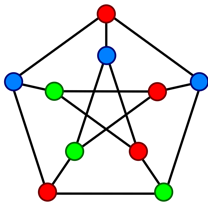

### Problem definition

For a graph $G=(V,E)$ and $k$ colours, find a vertex-colour assignment such that two adjacent/connected vertices have different colours.

Let's consider the following simple graph:



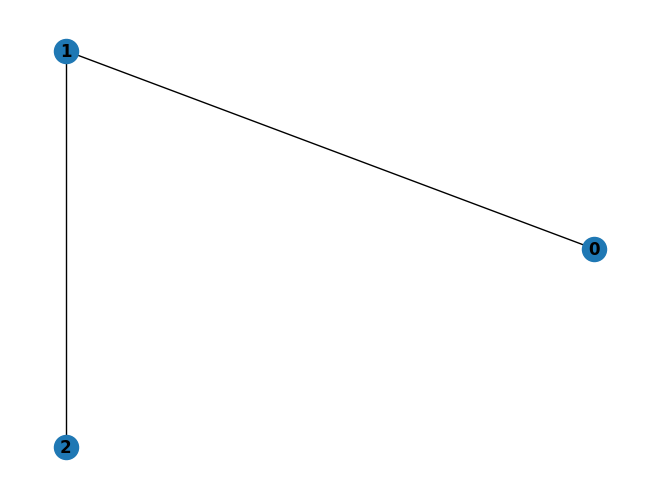

Where:
* $V=\{0,1,2\}$
* $E=\{(0,1), (1,2)\}$
* adjacency matrix:
$$
\left(\begin{array}{cc}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0
\end{array}\right)
$$

We want to find the QUBO formulation of the graph coloring problem with $k=2$.

### STEP 1: Variable definition

For a graph $G=(V,E)$ and $k$ colors, the binary variable $x_{ip}$ is equal to $1$ if vertex $i$ has color $p$, $0$ otherwise.

This definition requires a number of variables $N = |V| \times k = 3 * 2 = 6$.

Solving the problem means finding an assignment in $\{0,1\}$ for the variables $x_{ij}$, for example:
 $${\bf x} = (x_{0,yellow},x_{0,purple},x_{1,yellow},x_{1,purple},x_{2,yellow},x_{2,purple})$$
 $${\bf x} = (1,0,0,1,1,0)$$


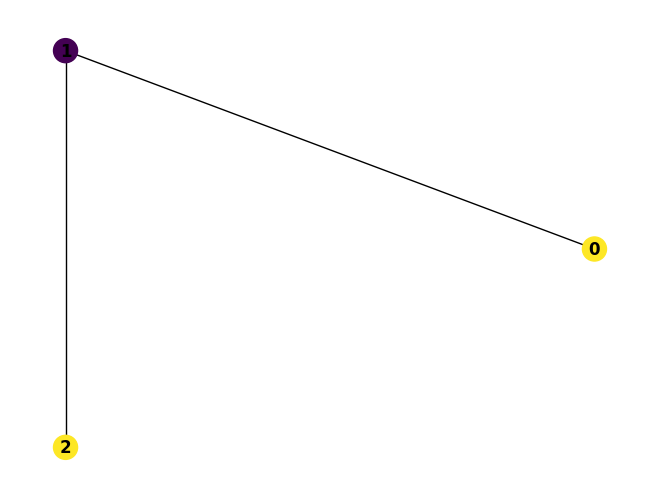

### STEP 2: Cost function definition

We have to satisfy the following constraints:
1. Each node $i$ is associated to only one color

$$
\sum_{p=1}^{k} x_{ip} = 1,  \forall i\in\{1\ldots |V|\}
$$

2. Adjacent nodes can't have the same color $p$

$$
 x_{ip}+x_{jp} \le 1, \forall p\in \{1\ldots k\}, (i,j)\in E
$$

These constraints can be translated into quadratic penalities and used to define the cost function $C({\bf x})$:

1.
$$\sum_{p=1}^{k} x_{ip} = 1 \qquad \longrightarrow \qquad P\left(\sum_{p=1}^{k} x_{ip} - 1\right)^2 \qquad \qquad \forall \: i\in\{1\ldots |V|\}
$$
2.
$$x_{ip}+x_{jp} \le 1 \qquad \longrightarrow \qquad \: P\left(x_{ip}x_{jp}\right) \qquad \qquad \qquad \forall p\in \{1\ldots k\}, (i,j)\in E
$$

where $P$ is an arbitrary integer positive constant.

The **COST FUNCTION** is:
$$
\min_{{\bf x}} C({\bf x}) = P\left(\sum_{p=1}^{k} x_{ip} - 1\right)^2 + Px_{ip}x_{jp} , \qquad \forall i\in\{1\ldots |V|\}, p\in \{1\ldots k\}, (i,j)\in E
$$

If you solve the equation, you obtain the QUBO formulation:
$$
\min_{{\bf x}\in \{0,1\}^{N}} C({\bf x}) = x^TQx
$$

In our example, the first set of constraints is:
$$
\begin{array}{l}
x_{01}+x_{02} = 1 \rightarrow P(x_{01}+x_{02} - 1)^2 \\
x_{11}+x_{12} = 1 \rightarrow P(x_{11}+x_{12} - 1)^2 \\
x_{21}+x_{22} = 1 \rightarrow P(x_{21}+x_{22} - 1)^2 \\
\end{array}
$$

The second set of constraints is:
\begin{array}{l}
x_{01}+x_{11} \le 1 \rightarrow P(x_{01}x_{11})\\
x_{02}+x_{12} \le 1 \rightarrow P(x_{02}x_{12})\\
x_{11}+x_{21} \le 1 \rightarrow P(x_{11}x_{21})\\
x_{12}+x_{22} \le 1 \rightarrow P(x_{12}x_{22})
\end{array}

Then, we define the objective function
$$C(x) = P((x_{01}+x_{02}-1)^2 + (x_{11}+x_{12}-1)^2 + (x_{21}+x_{22}-1)^2 + x_{01}x_{11}+x_{02}x_{12}+x_{11}x_{21}+x_{12}x_{22})$$

Let us map $x_{ik}$ into $y_{(i*K)+k}$:
$$[x_{01},x_{02},x_{11},x_{12},x_{21},x_{22}] \longleftrightarrow
  [y_{1}, y_{2}, y_{3}, y_{4}, y_{5}, y_{6}]$$

and, taking into account that $y_i^2=y_i$, we rewrite the objective function as
\begin{align}
C(y) & = P( (y_1+y_2-1)^2 + (y_3+y_4-1)^2 + (y_5+y_6-1)^2 +
               y_1y_3 + y_2y_4 + y_3y_5 + y_4y_6 ) \notag \\
     & = P(+2y_1y_2 + 2y_3y_4 + 2y_5y_6 + y_1y_3 + y_2y_4 + y_3y_5 + y_4y_6) + \notag \\
     & \, \quad + P( -y_1 -y_2 -y_3 -y_4 -y_5 -y_6) + 3P \notag
\end{align}

This can be then written as
$$
C(\bf y) = {\bf y}^TQ{\bf y} + {\bf g}^T{\bf y} + c
$$

where the diagonal of $Q$ is zero and ${\bf g} = {\bf -1}$.

### HANDS ON 1: QUBO formulation

In [2]:
# Useful packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import argparse

from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Sampler
from qiskit_algorithms import SamplingVQE

In [3]:
# Graphs definition

def test_selector(id):

  if (id == 1):
    N=3; K=2
    G=np.zeros([N,N])
    G[0][1]=1
    G[1][0]=1; G[1][2]=1
    G[2][1]=1

  elif (id == 2):
    N=5; K=3
    G=np.zeros([N,N])
    G[0][1]=1; G[0][4]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1; G[1][4]=1
    G[2][1]=1; G[2][3]=1
    G[3][1]=1; G[3][2]=1; G[3][4]=1
    G[4][0]=1; G[4][1]=1; G[4][3]=1

  elif (id == 3):
    N=4; K=2
    G=np.zeros([N,N])
    G[0][1]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1
    G[2][1]=1;
    G[3][1]=1

  elif (id == 4):
    N=6; K=3
    G=np.zeros([N,N])
    G[0][2]=1
    G[1][3]=1; G[1][4]=1
    G[2][0]=1; G[2][4]=1
    G[3][1]=1; G[3][4]=1; G[3][5]=1
    G[4][1]=1; G[4][2]=1; G[4][3]=1
    G[5][3]=1

  elif (id == 5):
    N=6; K=3
    G=np.zeros([N,N])
    G[0][1]=1; G[0][5]=1
    G[1][0]=1; G[1][2]=1; G[1][3]=1; G[1][5]=1
    G[2][1]=1; G[2][3]=1
    G[3][1]=1; G[3][2]=1; G[3][4]=1
    G[4][3]=1; G[4][5]=1
    G[5][0]=1; G[5][1]=1; G[5][4]=1


  return G, N, K

In [4]:
# useful functions

def draw_graph(G, color_list):
  print()
  if len(color_list) == 0:
    nx.draw_circular(G, with_labels=True, font_weight='bold')
  else:
    nx.draw_circular(G, with_labels=True, font_weight='bold', node_color=color_list)
  plt.show()

def getColors(solution,N,K):
  colors = np.empty(N)
  for ii in range(len(solution)):
    if solution[ii] == 1:
      inode = (ii//K)
      icolor = (ii%K)
      colors[inode] = icolor
  return colors

------ INPUT -------
N:  3
K:  2
G:
 [[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]



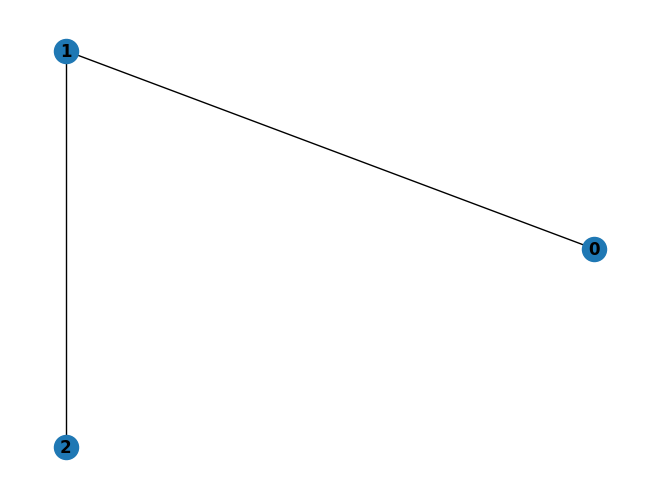

In [5]:
# select a graph from ID (N: number of node, K: number of color, G: adjacency matrix)
testid = 1

G, N, K = test_selector(testid)
print("------ INPUT -------")
print("N: ", N)
print("K: ", K)
print("G:\n", G)
draw_graph(nx.from_numpy_array(G), [])

#### Write your code in the cell below
* Step 1: initialize $Q$, $g$ and $c$ with the right dimensions, filling them with $0$s
  * Hint: $Q$ and $g$ could be a numpy array
* Step 2: add penalties from nodes constraints (each node is colored with just one color)
  * Hint: loop over nodes and colors and
      * add the linear terms $-1$ at $g$
      * add the quadratic terms $2 * x_{i,k} *x_{i+1,k}$ at $Q$ (remember that Q is symmetrical, so you have to halve the value)
      * increase the constant $c$ by 1
* Step 3: add penalities from edge constraints (two connected nodes have different colors)
  * Hint: loop over the edges (remember that Q is symmetrical, so you have to halve the value)
* Step 4: multiply Q, g, c for the penality $p=4$
* Step 5: solving by brute force finding $y$ that minimize $C(y) = {\bf y}^TQ{\bf y} + {\bf g}^T{\bf y} + c$
  * Hint:
    * initialize Ymin, Cmin
    * The list Ylist with all the possible results (all the numbers from 0 to 2(N*K)-1 expressed in base 2) is given
    * Compute $C(y) = {\bf y}^TQ{\bf y} + {\bf g}^T{\bf y} + c$ for every element Y of Ylist and save the result if it is the best found result
* Step 6: print the result
  * Hint: use the draw_graph function

Q:
 [[0. 4. 2. 0. 0. 0.]
 [4. 0. 0. 2. 0. 0.]
 [2. 0. 0. 4. 2. 0.]
 [0. 2. 4. 0. 0. 2.]
 [0. 0. 2. 0. 0. 4.]
 [0. 0. 0. 2. 4. 0.]]

g:  [-4. -4. -4. -4. -4. -4.]

c:  12 

computing: C(Y) = YQY + gY + c
    C(Y) min:  0.0
    Y min:  [0 1 1 0 0 1]

Graph coloring solution with QUBO:
y_01 = x_01 = true --> N0 C1
y_02 = x_10 = true --> N1 C0
y_05 = x_21 = true --> N2 C1




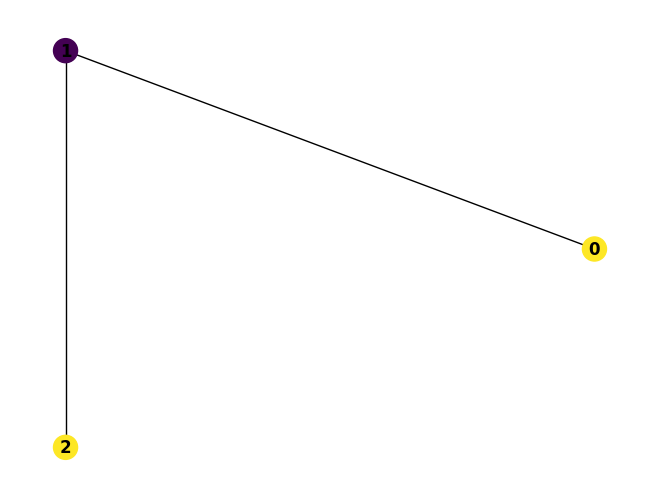

In [6]:
# Step 1
# Iniatilize Q assuming the mapping
# (i,k) --> (i*K+k), i index of node, k index of color
Q = np.zeros([N*K, N*K])
g = np.zeros(N*K)
c = 0

# Step 2
# add penalties from nodes constraints: a node is colored with one color
for ii in range(N):
  # add linear terms
  for kk in range(K):
    tt = ii*K+kk
    g[tt] = -1
  # add quadratic terms 2*x_{ii,kk}*x_{ii+1,kk}
  for kk in range(K-1):
    for kkk in range(kk+1,K):
      tt = ii*K+kk
      rr = ii*K+kkk
      Q[tt][rr] += 1
      Q[rr][tt] += 1
      # print("kk: ", kk, "ii: ", ii, "kkk: ", kkk, "tt: ", tt, "rr: ",rr)
  # add constant
  c += 1
# print("Q:\n", Q)

# Step 3
# add penalties from edges constraints: two connected nodes i and j have
# different colors
for ii in range(N):
  for jj in range(ii+1,N):
    if G[ii][jj] == 1:
      for kk in range(K):
        tt = ii*K+kk # i-index
        rr = jj*K+kk # j-index
        Q[tt][rr] += 0.5
        Q[rr][tt] += 0.5
        # print("ii: ", ii, "jj: ", jj, "kk: ", kk, "tt: ", tt, "rr: ", rr)
# print("Q:\n", Q)

# Step 4
penality = 4
Q = penality*Q
g = penality*g
c = penality*c
print("Q:\n", Q)
print("\ng: ", g)
print("\nc: ", c, "\n")

# Step 5
# Solving QUBO: finding Y that minimizes C(Y) = YQY + gY + c
Cmin = float('inf')

# building cross-product (0,1)^(N*K)
# all the numbers from 0 to 2(N*K)-1 expressed in base 2
Ylist = list(itertools.product([0, 1], repeat=(N*K)))
# print("Ylist - size: ", len(Ylist), "\n", Ylist)

# compute C(Y) = YQY + gY + c for every Y
for ii in range(len(Ylist)):
  Y = np.array(Ylist[ii])
  Cy=(Y.dot(Q).dot(Y.transpose()))+g.dot(Y.transpose())+c
  if ( Cy < Cmin ):
    Cmin = Cy
    Ymin = Y.copy()

# Step 6
print("computing: C(Y) = YQY + gY + c")
print("    C(Y) min: ", Cmin)
print("    Y min: ", Ymin)
print("\nGraph coloring solution with QUBO:")
for ii in range(len(Ymin)):
  if Ymin[ii] == 1:
    print("y_%02d = x_%d%d = true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Ymin, N, K))

### STEP 3: Translating into Ising problem

From the QUBO formulation
$$
\min_{{\bf y}\in \{0,1\}^{N}} C({\bf y})
$$
we have to compute the equivalent Ising problem
$$
\min_{{\bf z}\in \{-1,+1\}^{N}} E({\bf z})
$$
Since the two formulations have a similar form, we start with a change of variable using the transformation
$$
y_i = \dfrac{1-z_i}{2}, \:\:\:\:\: z_i \in \{-1,1\}
$$
that maps $0\leftrightarrow 1$ and $1 \leftrightarrow -1$.

We obtain:
$$
\begin{align}
{\bf Q_z} = & 0.25 \cdot {\bf Q} \\
{\bf g_z}^T = & -0.25 \cdot {\bf 1}^T \left({\bf Q}^T + {\bf Q}\right) - 0.5{\bf g}^T \\
c_z = & 0.25\cdot {\bf 1}^T {\bf Q} {\bf 1} + 0.5{\bf g}^T{\bf 1}
\end{align}
$$

Where ${\bf 1}$ is a matrix with all $1$ as elements.

Note that:
$$
  \min_{\bf Y} C({\bf Y}) \equiv \min_{\bf Z} E({\bf Z})
$$

### HANDS ON 2: Ising Formulation

#### Write your code in the cell below
* Step 7: initialize $ONES$, $ONEST$ and $QT$ with the right dimensions
* Step 8: compte $Qz$, $gzT$ and $cz$ as described by the equivalences above
* Step 9: solving Ising by brute force findin Z that minimizes $ E(Z) = ZT*Qz*Z + gzT * Z + cz$ (see step 5)
* Step 10 (given): convert Zmin to Ymin and call the variable Yzmin
* Step 11 (given): verify that Yzmin is a solution for the original QUBO problem

Qz:
 [[0.  1.  0.5 0.  0.  0. ]
 [1.  0.  0.  0.5 0.  0. ]
 [0.5 0.  0.  1.  0.5 0. ]
 [0.  0.5 1.  0.  0.  0.5]
 [0.  0.  0.5 0.  0.  1. ]
 [0.  0.  0.  0.5 1.  0. ]]

gzT:  [-1. -1. -2. -2. -1. -1.]

cz:  10.0 

computing: E(Z) = ZT*Qz*Z + gzT * Z + cz
    E(Z) min:  0.0
    Z min:  [ 1 -1 -1  1  1 -1]
    convert Z min to Y min:  [0. 1. 1. 0. 0. 1.]
    Yz min:  0.0

Graph coloring solution with Ising:
y_01 --> x_01=true --> N0 C1
y_02 --> x_10=true --> N1 C0
y_05 --> x_21=true --> N2 C1




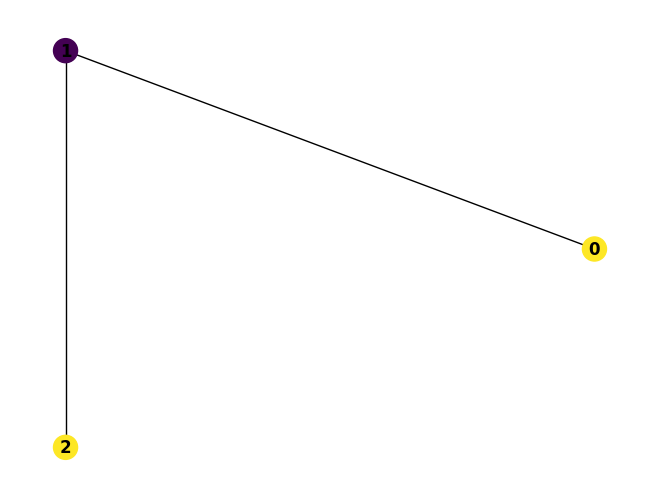

In [7]:
# Step 7
ONES = np.ones(N*K)
ONEST = ONES.transpose()
QT = Q.transpose()

# Step 8
Qz  =  0.25*Q
gzT = -0.25*(ONES.dot(QT+Q)) - 0.5*g
cz  =  0.25*(ONES.dot(Q.dot(ONEST))) + 0.5*g.dot(ONEST) + c
print("Qz:\n", Qz)
print("\ngzT: ", gzT)
print("\ncz: ", cz, "\n")

# Step 9
# Solving Ising: finding Z that minimizes E(Z) = ZT*Qz*Z + gzT * Z + cz
Ezmin = float('inf')

# building cross-product (0,1)^(N*K)
Zlist = list(itertools.product([1, -1], repeat=(N*K)))

# compute E(Z) = ZT*Qz*Z + gzT * Z + cz for every Z
for ii in range(len(Zlist)):
  Z = np.array(Zlist[ii])
  ZT= Z.transpose()
  Ez = (Z.dot(Qz)).dot(ZT) + gzT.dot(ZT) + cz
  if ( Ez < Ezmin ):
    Ezmin = Ez
    Zmin = Z.copy()
# print("\nZmin: ", Zmin, "Ezmin: ", Ezmin, "cz: ", cz)

# Step 10
# convert Zmin to Ymin
Yzmin = np.zeros(N*K)
for ii in range(len(Zmin)):
  Yzmin[ii] = (1-Zmin[ii])//2

# Step 11
print("computing: E(Z) = ZT*Qz*Z + gzT * Z + cz")
print("    E(Z) min: ", Ezmin)
print("    Z min: ", Zmin)
print("    convert Z min to Y min: ", Yzmin)
print("    Yz min: ", (Yzmin.dot(Q).dot(Yzmin.transpose()))+g.dot(Yzmin.transpose())+c)

print("\nGraph coloring solution with Ising:")
for ii in range(len(Yzmin)):
  if Yzmin[ii] == 1:
    print("y_%02d --> x_%d%d=true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Yzmin, N, K))

### STEP 4: Translating into Ising Hamiltonian

The energy function

$$
E({\bf Z}) = {\bf Z}^T {\bf Q_z} {\bf Z} + {\bf g_z}^T {\bf Z} + c_z
$$

can be translated into a Hamiltonian ${\cal H}$ for a $N$-qbit system replacing the terms $z_i z_j$ and $z_i$ in the energy function $E({\bf z})$ as

* $z_i z_j$ by $P_{ij} = \mathbf{1}_1 \otimes \ldots \otimes \underbrace{\sigma_i^Z}_{i^{th} \mbox{ factor}} \otimes \cdots \otimes \underbrace{\sigma_j^Z}_{j^{th} \mbox{ factor}} \otimes \cdots \otimes \mathbf{1}_N$
* $z_i$ by $P_i = \mathbf{1}_1 \otimes \cdots \otimes \underbrace{\sigma_i^Z}_{i^{th} \mbox{ factor}} \otimes \cdots \otimes \mathbf{1}_N$


where $\sigma_k^Z$ is a Pauli Z-matrix and $\mathbf{1}$ the identity matrix.


#### Write your code in the cell below
* Step 12 (done): initialize pauli_list and coeffs as two empty lists
* Step 13: compute coefficent and pauli string for each linear term
  * Hint: for every element in gzT we have to define the corresponding term of the sum. To do so, we use the "Pauli()" function. It requires two numpy lists as input (the dimension is the qubit number):
      * the first is a list of all 0 except for the i-th element that have to be 1
      * the second is a list of all 0

  So the steps are: for every element in gzT != 0
    * Define the two lists as described above and the corresponding Pauli operator
    * Append the Pauli operator to the "pauli_list" list
    * Append the corresponding coefficient (the value in gzT) to "coeffs"
* Step 14: compute coefficent and pauli string for each quadratic term
  * Hint: for every element in Qz we have to define the corresponding term of the sum as in the previous step. This time, the first list to build the Pauli operator needs 1 for the i-th element and 1 for the j-th element.

  So the steps are: for every element in Qz != 0
    * Define the two lists as described above and the corresponding Pauli operator
    * Append the Pauli operator to the "pauli_list" list
    * Append the corresponding coefficient (the value in Qz) to "coeffs"

* Step 15 (done): Define the Ising Hamiltonian with the "SparsePauliOp()" function using "pauli_list" and "coeffs"; print the offset, the Ising Hamiltonian and how many qubits the system needs

In [8]:
# Step 12
pauli_list = []
coeffs = []

# Step 13
for ii in range(N*K):
  if gzT[ii] != 0:
    vp = np.zeros(N*K)
    wp = np.zeros(N*K)
    vp[ii] = 1
    pauli_list.append(Pauli((vp, wp)))
    coeffs.append(gzT[ii])

# Step 14
for ii in range(N*K):
  for jj in range(ii):
    if Qz[ii,jj] != 0:
      # elements at the bottom of the diagonal different from 0
      vp = np.zeros(N*K)
      wp = np.zeros(N*K)
      vp[ii] = 1
      vp[jj] = 1
      pauli_list.append(Pauli((vp, wp)))
      coeffs.append(2.0*Qz[ii,jj])

# Step 15
qubit_op = SparsePauliOp(pauli_list, coeffs)
print("qubit_op ", qubit_op)

print("Offset:", -cz)
print("Ising Hamiltonian:")
for ii in range(qubit_op.size):
    print(qubit_op.coeffs[ii].real, "*", qubit_op.paulis[ii], "+")

print("\nThis instance requires:", qubit_op.num_qubits, "qbits")

qubit_op  SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIZIZI', 'IIZZII', 'IZIZII', 'ZIZIII', 'ZZIIII'],
              coeffs=[-1.+0.j, -1.+0.j, -2.+0.j, -2.+0.j, -1.+0.j, -1.+0.j,  2.+0.j,  1.+0.j,
  1.+0.j,  2.+0.j,  1.+0.j,  1.+0.j,  2.+0.j])
Offset: -10.0
Ising Hamiltonian:
-1.0 * IIIIIZ +
-1.0 * IIIIZI +
-2.0 * IIIZII +
-2.0 * IIZIII +
-1.0 * IZIIII +
-1.0 * ZIIIII +
2.0 * IIIIZZ +
1.0 * IIIZIZ +
1.0 * IIZIZI +
2.0 * IIZZII +
1.0 * IZIZII +
1.0 * ZIZIII +
2.0 * ZZIIII +

This instance requires: 6 qbits


### STEP 5: Running on local quantum simulator


#### Write your code in the cell below
* Step 16 (done): initialize a `SamplingVQE` object with an ansatz (use "TwoLocal" function) and an optimizer (use "SPSA()" function)
* Step 17: run the computation with the `compute_minimum_eigenvalue` method of the "vqe" object. It requires the Ising Hamiltonian as input
* Step 18 (done): print the solution of the problem
* Step 19 (done): check if the result is correct sobstituting the binary string in the cost function

     ┌──────────┐ ░                 ░  ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─░──■──────────────░──┤ Ry(θ[6]) ├
     ├──────────┤ ░  │              ░  ├──────────┤
q_1: ┤ Ry(θ[1]) ├─░──■──■───────────░──┤ Ry(θ[7]) ├
     ├──────────┤ ░     │           ░  ├──────────┤
q_2: ┤ Ry(θ[2]) ├─░─────■──■────────░──┤ Ry(θ[8]) ├
     ├──────────┤ ░        │        ░  ├──────────┤
q_3: ┤ Ry(θ[3]) ├─░────────■──■─────░──┤ Ry(θ[9]) ├
     ├──────────┤ ░           │     ░ ┌┴──────────┤
q_4: ┤ Ry(θ[4]) ├─░───────────■──■──░─┤ Ry(θ[10]) ├
     ├──────────┤ ░              │  ░ ├───────────┤
q_5: ┤ Ry(θ[5]) ├─░──────────────■──░─┤ Ry(θ[11]) ├
     └──────────┘ ░                 ░ └───────────┘

energy (eigenvalue): -9.981041317592206
Qmin (solution) = [1 0 0 1 1 0] cost (energy + offset) = 0.01895868240779386
Computing time =  13.371392726898193

Graph coloring solution with VQE:
q_00 --> x_00=true --> N0 C0
q_03 --> x_11=true --> N1 C1
q_04 --> x_20=true --> N2 C0




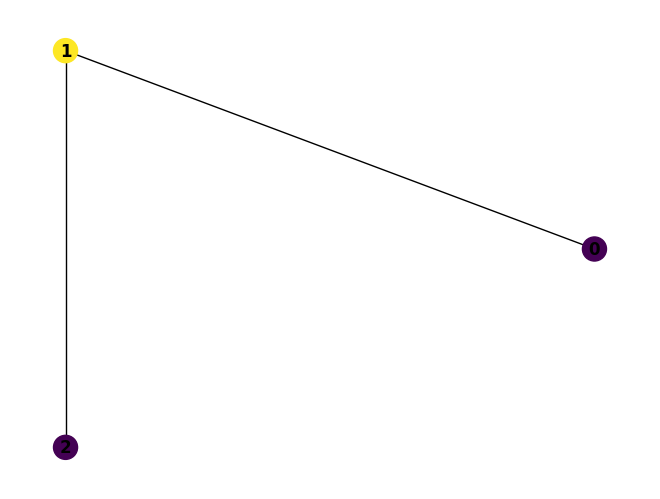


C(Qmin):  0.0
C(min):  0.0
OK CYmin == CQmin


In [9]:
# Step 16
ry = TwoLocal(qubit_op.num_qubits, "ry", "cz", reps=3, entanglement="linear")
print(TwoLocal(qubit_op.num_qubits, "ry", "cz", reps=1, insert_barriers=True, entanglement="linear").decompose())

optimizer = SPSA(maxiter=300)
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

# Step 17
vqe_result = vqe.compute_minimum_eigenvalue(qubit_op)

# Step 18
energy = vqe_result.eigenvalue.real
best_solution = vqe_result.best_measurement["bitstring"]
Qmin = np.asarray([int(y) for y in reversed(best_solution)])
cost = energy + cz
print("\nenergy (eigenvalue):", energy)
print("Qmin (solution) = " + str(Qmin) + " cost (energy + offset) = " + str(cost))
print("Computing time = ", vqe_result.optimizer_time)

print("\nGraph coloring solution with VQE:")
for ii in range(len(Qmin)):
  if Qmin[ii] == 1:
    print("q_%02d --> x_%d%d=true --> N%d C%d" % (ii, (ii//K), (ii%K), (ii//K), (ii%K)))
print()
draw_graph(nx.from_numpy_array(G), getColors(Qmin, N, K))

# Step 19
CQmin = (Qmin.dot(Q).dot(Qmin.transpose()))+g.dot(Qmin.transpose())+c
print("\nC(Qmin): ", CQmin)
print("C(min): ", Cmin)
if Cmin == CQmin:
  print("OK CYmin == CQmin")
else:
  print("KO QYmin != CQmin")